In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#Reading The Dataset
data = pd.read_csv("C:/Users/Akshai Maria vishal/OneDrive - athenatec.com/Desktop/Flipkart-Reviews-Sentiment-Analysis/COC review.csv")
print(data.head())

              User Name                                             Review  \
0  Cheruangdibo Chawang  At first sight i considered coc as my favourit...   
1           Aman Zaheer                                                OWj   
2         Kanishk Krish  It's a great game with great concept but it wo...   
3    Vindhyachal Sharma  It's a good game but when it comes to help and...   
4         Krishna Kumar  Hey COC Team, Can you add an update where we c...   

   Rating  
0       1  
1       5  
2       5  
3       3  
4       5  


In [4]:
# Cleaning the data
print(data.isnull().sum())
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
def clean(text):
 text = str(text).lower()
 text = re.sub('\[.*?\]', '', text)
 text = re.sub('https?://\S+|www\.\S+', '', text)
 text = re.sub('<.*?>+', '', text)
 text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
 text = re.sub('\n', '', text)
 text = re.sub('\w*\d\w*', '', text)
 text = [word for word in text.split(' ') if word not in stopword]
 text=" ".join(text)
 text = [stemmer.stem(word) for word in text.split(' ')]
 text=" ".join(text)
 return text
data["Review"] = data["Review"].apply(clean)

User Name    0
Review       0
Rating       0
dtype: int64


[nltk_data] Downloading package stopwords to C:\Users\Akshai Maria
[nltk_data]     vishal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
#Data Exploration
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, 
 values = quantity, 
 names = numbers, hole = 0.5)
figure.show()

ModuleNotFoundError: No module named 'plotly'

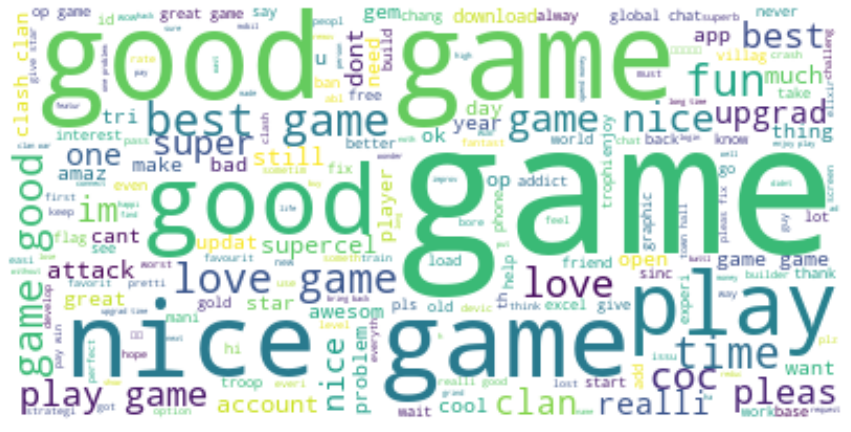

In [6]:
# WordCloud
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
 background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
# Model building
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in 
data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Akshai Maria
[nltk_data]     vishal\AppData\Roaming\nltk_data...


                                              Review  Positive  Negative  \
0  first sight consid coc favourit game im fate i...     0.000     0.077   
1                                                owj     0.000     0.000   
2  great game great concept would great ad back g...     0.506     0.000   
3  good game come help support supercel link acc ...     0.390     0.038   
4  hey coc team add updat turn onoff spectat opti...     0.000     0.162   

   Neutral  
0    0.923  
1    1.000  
2    0.494  
3    0.572  
4    0.838  


In [9]:
# Result
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])
def sentiment_score(x, y, z):
 if (x>y) and (x>z):
     print("Positive ")
 elif (y>x) and (y>z):
     print("Negative ")
 else:
     print("Neutral ")
sentiment_score(x, y, z)
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Neutral 
Positive:  944.6910000000018
Negative:  72.457
Neutral:  1017.849999999998
